In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from download import download
pd.__version__

'1.0.5'

In [2]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vQVtdpXMHB4g9h75a0jw8CsrqSuQmP5eMIB2adpKR5hkRggwMwzFy5kB-AIThodhVHNLxlZYm8fuoWj/pub?gid=2105854808&single=true&output=csv'
path_target = "./velo.csv"
download(url, path_target, replace = True)

df = pd.read_csv("velo.csv")
df.head()


file_sizes: 50.3kB [00:00, 1.58MB/s]                                            
Successfully downloaded file to ./velo.csv


,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total,Unnamed: 4,Remarque
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,12/03/2020,11:05:00,109.0,109.0,NaN,NaN
3,12/03/2020,14:30:00,441.0,441.0,NaN,NaN
4,13/03/2020,10:02:00,1921.0,385.0,NaN,NaN


In [3]:
df=df[['Date',"Heure / Time",\
    'Vélos depuis le 1er janvier / Grand total',\
        'Vélos ce jour / Today\'s total']].dropna()
df

,Date,Heure / Time,Vélos depuis le 1er janvier / Grand total,Vélos ce jour / Today's total
2,12/03/2020,11:05:00,109.0,109.0
3,12/03/2020,14:30:00,441.0,441.0
4,13/03/2020,10:02:00,1921.0,385.0
5,13/03/2020,14:15:00,2305.0,769.0
6,13/03/2020,18:21:00,2822.0,1286.0
...,...,...,...,...
1499,31/03/2021,15:04:00,109811.0,1044.0
1500,31/03/2021,16:27:00,109971.0,1204.0
1501,31/03/2021,17:00:00,110050.0,1283.0
1502,31/03/2021,17:13:00,110092.0,1325.0


In [4]:
time_improved=pd.to_datetime(df['Date'],format='%d/%m/%Y')


In [5]:
dfj=df.drop(columns=['Date',\
    'Vélos depuis le 1er janvier / Grand total'])
dfj
dfj['DateTime'] = time_improved
dfj=dfj.set_index(['DateTime'])
dfj = dfj[~dfj.index.duplicated(keep='first')]
dfj

,Heure / Time,Vélos ce jour / Today's total
DateTime,,
2020-03-12,11:05:00,109.0
2020-03-13,10:02:00,385.0
2020-03-14,16:26:43,642.0
2020-03-15,09:05:50,50.0
2020-03-16,06:57:00,14.0
...,...,...
2021-03-27,08:29:00,52.0
2021-03-28,07:50:00,35.0
2021-03-29,09:33:00,358.0


In [6]:
dfjF=dfj[dfj.index.weekday==4]
dfjF=dfjF.reset_index()
dfjF
dfjF['Heure']=pd.to_datetime(dfjF["Heure / Time"])
dfjFH=dfjF.drop(columns=["DateTime","Heure / Time"])
dfjFH
dfjFH=dfjFH.set_index("Heure")
dfjFH=dfjFH.sort_index(axis=0)
dfjFH


,Vélos ce jour / Today's total
Heure,
2021-03-31 01:01:00,30.0
2021-03-31 01:52:00,44.0
2021-03-31 05:06:00,1.0
2021-03-31 07:35:00,35.0
2021-03-31 07:40:00,42.0
2021-03-31 07:57:00,68.0
2021-03-31 08:03:00,23.0
2021-03-31 08:23:00,327.0
2021-03-31 08:23:00,155.0


In [7]:
dfjF=dfj[dfj.index.weekday==4]
dfjF=dfjF.reset_index()
dfjF
dfjF['seconde']=dfjF["Heure / Time"].map(lambda x: int(x[:2])*60*60+int(x[3:5])*60+int(x[6:]))
dfjFH=dfjF.drop(columns=["DateTime","Heure / Time"])
dfjFH
dfjFH=dfjFH.set_index("seconde")
dfjFH=dfjFH.sort_index(axis=0)
dfjFH


,Vélos ce jour / Today's total
seconde,
3660,30.0
6720,44.0
18360,1.0
27300,35.0
27600,42.0
28620,68.0
28980,23.0
30180,327.0
30180,155.0


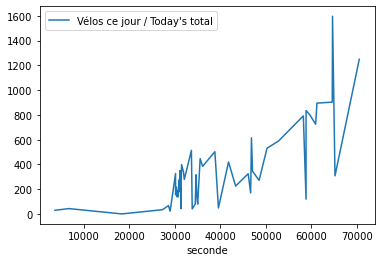

In [10]:
dfjFH.plot()

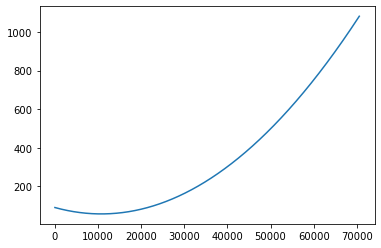

In [12]:
x=np.array(dfjFH.index)

y=np.array(dfjFH.iloc[:,0])
mymodel = np.poly1d(np.polyfit(x, y, 2))
myline=np.arange(0,70560,1)
plt.plot(myline, mymodel(myline))


In [25]:
mymodel(9*60*60)


190.66009486159552

In [24]:
mymodel

poly1d([ 2.86734465e-07, -6.16500492e-03,  8.94038818e+01])